In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data_train = pd.read_csv("/content/dataset.csv")

In [ ]:
data_train.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34445 entries, 0 to 34444
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      34445 non-null  object 
 1   CustomerID              34445 non-null  object 
 2   Month                   34445 non-null  object 
 3   Name                    31011 non-null  object 
 4   Age                     34445 non-null  int64  
 5   SSN                     34445 non-null  object 
 6   Occupation              32075 non-null  object 
 7   AnnualIncome            34445 non-null  float64
 8   MonthlyInhandSalary     29300 non-null  float64
 9   NumBankAccounts         34445 non-null  int64  
 10  NumCreditCard           34445 non-null  int64  
 11  InterestRate            34445 non-null  int64  
 12  NumofLoan               34444 non-null  float64
 13  TypeofLoan              30484 non-null  object 
 14  Delayfromduedate        34444 non-null

In [ ]:

data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34445.0,1.086154e+02,6.764521e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.674000e+03
AnnualIncome,34445.0,1.728846e+05,1.389672e+06,7.006520e+03,19721.210000,38365.210000,73713.480000,2.418881e+07
MonthlyInhandSalary,29300.0,4.273701e+03,3.227386e+03,3.321283e+02,1663.914167,3164.084167,6051.381667,1.513670e+04
NumBankAccounts,34445.0,1.677492e+01,1.161411e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
NumCreditCard,34445.0,2.336267e+01,1.323296e+02,0.000000e+00,4.000000,6.000000,7.000000,1.499000e+03
InterestRate,34445.0,6.893764e+01,4.506387e+02,1.000000e+00,7.000000,13.000000,20.000000,5.788000e+03
NumofLoan,34444.0,3.125450e+00,6.338270e+01,-1.000000e+02,2.000000,3.000000,5.000000,1.495000e+03
Delayfromduedate,34444.0,2.102889e+01,1.474185e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
NumofDelayedPayment,32022.0,2.962160e+01,2.155424e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.384000e+03
ChangedCreditLimit,33749.0,1.026340e+01,6.780972e+00,-6.480000e+00,5.150000,9.250000,14.600000,3.697000e+01


In [ ]:
data_train.isnull().sum()

,0
ID,0
CustomerID,0
Month,0
Name,3434
Age,0
SSN,0
Occupation,2370
AnnualIncome,0
MonthlyInhandSalary,5145
NumBankAccounts,0


In [ ]:
data_train = data_train.drop(['ID', 'SSN', 'Name', 'CustomerID'], axis = 1)

In [ ]:
data_train.isnull().sum()

,0
Month,0
Age,0
Occupation,2370
AnnualIncome,0
MonthlyInhandSalary,5145
NumBankAccounts,0
NumCreditCard,0
InterestRate,0
NumofLoan,1
TypeofLoan,3961


In [ ]:
  data_train = data_train.drop(['TypeofLoan', 'Occupation','Month'], axis = 1)

In [ ]:
data_train.isnull().sum()

,0
Age,0
AnnualIncome,0
MonthlyInhandSalary,5145
NumBankAccounts,0
NumCreditCard,0
InterestRate,0
NumofLoan,1
Delayfromduedate,1
NumofDelayedPayment,2423
ChangedCreditLimit,696


In [ ]:
data_train = data_train.dropna()

In [ ]:
data_train.isna().sum()

,0
Age,0
AnnualIncome,0
MonthlyInhandSalary,0
NumBankAccounts,0
NumCreditCard,0
InterestRate,0
NumofLoan,0
Delayfromduedate,0
NumofDelayedPayment,0
ChangedCreditLimit,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17859 entries, 6 to 34440
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     17859 non-null  int64  
 1   AnnualIncome            17859 non-null  float64
 2   MonthlyInhandSalary     17859 non-null  float64
 3   NumBankAccounts         17859 non-null  int64  
 4   NumCreditCard           17859 non-null  int64  
 5   InterestRate            17859 non-null  int64  
 6   NumofLoan               17859 non-null  float64
 7   Delayfromduedate        17859 non-null  float64
 8   NumofDelayedPayment     17859 non-null  float64
 9   ChangedCreditLimit      17859 non-null  float64
 10  NumCreditInquiries      17859 non-null  float64
 11  CreditMix               17859 non-null  object 
 12  OutstandingDebt         17859 non-null  float64
 13  CreditUtilizationRatio  17859 non-null  float64
 14  CreditHistoryAge        17859 non-null  obj

In [ ]:
Categorical_features = ['CreditMix','CreditHistoryAge','PaymentofMinAmount','PaymentBehaviour','CreditScore']

In [ ]:
data_train[Categorical_features]

,CreditMix,CreditHistoryAge,PaymentofMinAmount,PaymentBehaviour,CreditScore
6,Good,22 Years and 7 Months,No,LowspentSmallvaluepayments,Good
8,Good,26 Years and 7 Months,No,LowspentSmallvaluepayments,Standard
9,Good,26 Years and 8 Months,No,HighspentLargevaluepayments,Good
12,Good,26 Years and 11 Months,No,LowspentSmallvaluepayments,Good
13,Good,27 Years and 0 Months,No,HighspentLargevaluepayments,Good
...,...,...,...,...,...
34430,Standard,26 Years and 3 Months,Yes,HighspentLargevaluepayments,Standard
34431,Standard,26 Years and 4 Months,Yes,LowspentSmallvaluepayments,Standard
34434,Standard,28 Years and 11 Months,Yes,LowspentLargevaluepayments,Standard
34439,Standard,29 Years and 4 Months,Yes,HighspentSmallvaluepayments,Standard


In [ ]:
for feature in Categorical_features:
    unique_values = data_train[feature].unique()
    print(f"Unique values in {feature}:")
    print(unique_values)

Unique values in CreditMix:
['Good' 'Standard' 'Bad']
Unique values in CreditHistoryAge:
['22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 11 Months' '27 Years and 0 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '18 Years and 1 Months'
 '18 Years and 2 Months' '18 Years and 3 Months' '18 Years and 4 Months'
 '17 Years and 3 Months' '17 Years and 4 Months' '17 Years and 5 Months'
 '17 Years and 6 Months' '17 Years and 7 Months' '30 Years and 10 Months'
 '31 Years and 2 Months' '31 Years and 3 Months' '32 Years and 0 Months'
 '32 Years and 2 Months' '30 Years and 7 Months' '30 Years and 8 Months'
 '30 Years and 9 Months' '30 Years and 11 Months' '21 Years and 4 Months'
 '21 Years and 8 Months' '21 Years and 11 Months' '26 Years and 6 Months'
 '19 Years and 2 Months' '19 Years and 3 Months' '19 Years and 5 Months'
 '19 Years and 6 Months' '19 Years and 7 Months' '19 Years and 8 Months'
 '25 Years and 5 Months' '25 Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['CreditScore'] = le.fit_transform(data_train['CreditScore'])

In [ ]:
le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data_train['PaymentofMinAmount'].values.reshape(-1, 1))

In [ ]:
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentofMinAmount']))
data_train = data_train.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
data_train= pd.concat([data_train, encoded_data_train], axis=1)

In [ ]:
data_copy = data_train

In [ ]:
def getMonths(duration):
    years, months = int(duration.split()[0]), int(duration.split()[3])
    months += years * 12
    return months
data_copy['CreditHistoryAge'] = data_copy['CreditHistoryAge'].apply(getMonths)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['CreditMix'] = le.fit_transform(data_copy['CreditMix'])
le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data_copy['PaymentBehaviour'].values.reshape(-1, 1))
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentBehaviour']))
data_train = data_copy.reset_index(drop=True)
data_train= pd.concat([data_train, encoded_data_train], axis=1)

In [ ]:
data_train

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,MonthlyBalance,CreditScore,PaymentofMinAmount_No,PaymentofMinAmount_Yes,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments
0,23,19114.12,1824.843333,3,4,3,4.0,3.0,8.0,11.27,...,244.565317,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,28,34847.84,3037.986667,2,4,6,1.0,3.0,4.0,5.42,...,470.690627,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,34847.84,3037.986667,2,4,6,1.0,7.0,1.0,7.42,...,484.591214,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28,34847.84,3037.986667,2,4,6,1.0,3.0,1.0,6.42,...,444.867032,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28,34847.84,3037.986667,2,4,6,1.0,3.0,0.0,5.42,...,481.505262,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,41,54052.82,4777.401667,4,6,11,3.0,6.0,16.0,19.75,...,504.588477,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
17855,41,54052.82,4777.401667,4,6,11,3.0,6.0,16.0,13.75,...,147.791085,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17856,45,19922.88,1711.240000,6,6,10,0.0,33.0,11.0,0.57,...,298.063123,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17857,45,15573910.00,1711.240000,6,6,10,0.0,28.0,12.0,0.57,...,334.902956,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17859 entries, 0 to 17858
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            17859 non-null  int64  
 1   AnnualIncome                                   17859 non-null  float64
 2   MonthlyInhandSalary                            17859 non-null  float64
 3   NumBankAccounts                                17859 non-null  int64  
 4   NumCreditCard                                  17859 non-null  int64  
 5   InterestRate                                   17859 non-null  int64  
 6   NumofLoan                                      17859 non-null  float64
 7   Delayfromduedate                               17859 non-null  float64
 8   NumofDelayedPayment                            17859 non-null  float64
 9   ChangedCreditLimit                             178

In [ ]:
data_train = data_train.drop(['PaymentofMinAmount', 'PaymentBehaviour'], axis = 1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17859 entries, 0 to 17858
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            17859 non-null  int64  
 1   AnnualIncome                                   17859 non-null  float64
 2   MonthlyInhandSalary                            17859 non-null  float64
 3   NumBankAccounts                                17859 non-null  int64  
 4   NumCreditCard                                  17859 non-null  int64  
 5   InterestRate                                   17859 non-null  int64  
 6   NumofLoan                                      17859 non-null  float64
 7   Delayfromduedate                               17859 non-null  float64
 8   NumofDelayedPayment                            17859 non-null  float64
 9   ChangedCreditLimit                             178

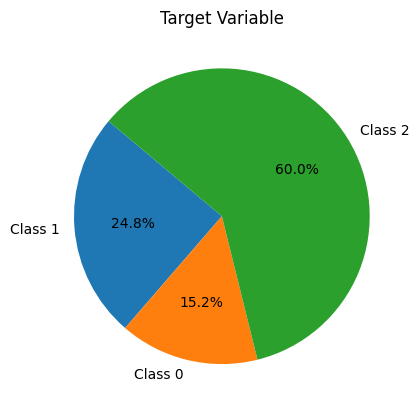

In [ ]:
import matplotlib.pyplot as plt

arr_0, arr_1, arr_2 = [], [], []
for i in data_train['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

In [ ]:
data_class_1 = data_train[data_train['CreditScore'] == 1]
data_class_2 = data_train[data_train['CreditScore'] == 2]
data_class_0 = data_train[data_train['CreditScore'] == 0]

data_class_1_oversampled = data_class_1.sample(Class_2, replace=True)
data_class_0_oversampled = data_class_0.sample(Class_2, replace=True)


data_oversampled = pd.concat([data_class_2, data_class_1_oversampled], axis=0)
data_oversampled = pd.concat([data_oversampled, data_class_0_oversampled], axis=0)

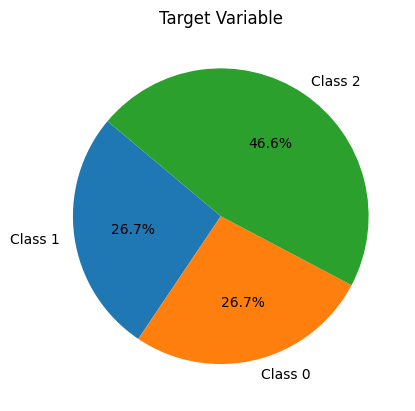

In [ ]:
arr_0, arr_1, arr_2 = [], [], []
for i in data_oversampled['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

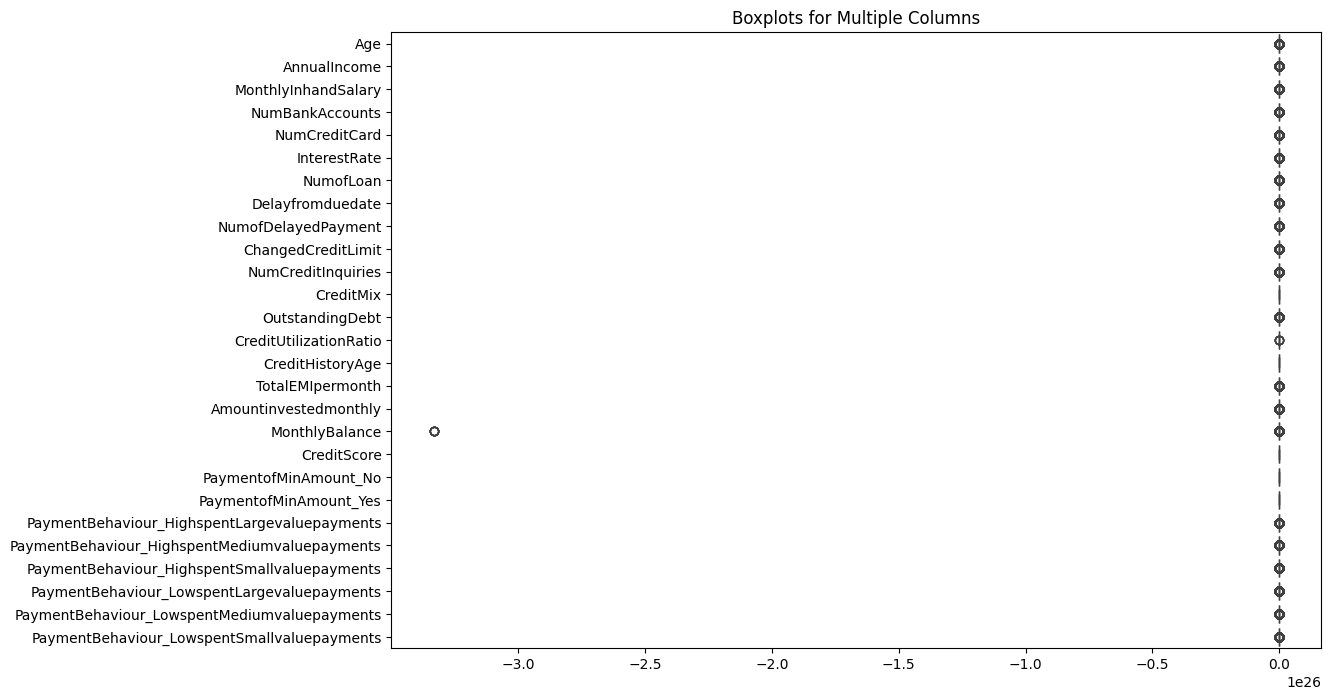

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_oversampled, orient='h')
plt.title('Boxplots for Multiple Columns')

In [ ]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34722 entries, 1 to 3281
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            34722 non-null  int64  
 1   AnnualIncome                                   34722 non-null  float64
 2   MonthlyInhandSalary                            34722 non-null  float64
 3   NumBankAccounts                                34722 non-null  int64  
 4   NumCreditCard                                  34722 non-null  int64  
 5   InterestRate                                   34722 non-null  int64  
 6   NumofLoan                                      34722 non-null  float64
 7   Delayfromduedate                               34722 non-null  float64
 8   NumofDelayedPayment                            34722 non-null  float64
 9   ChangedCreditLimit                             34722 non

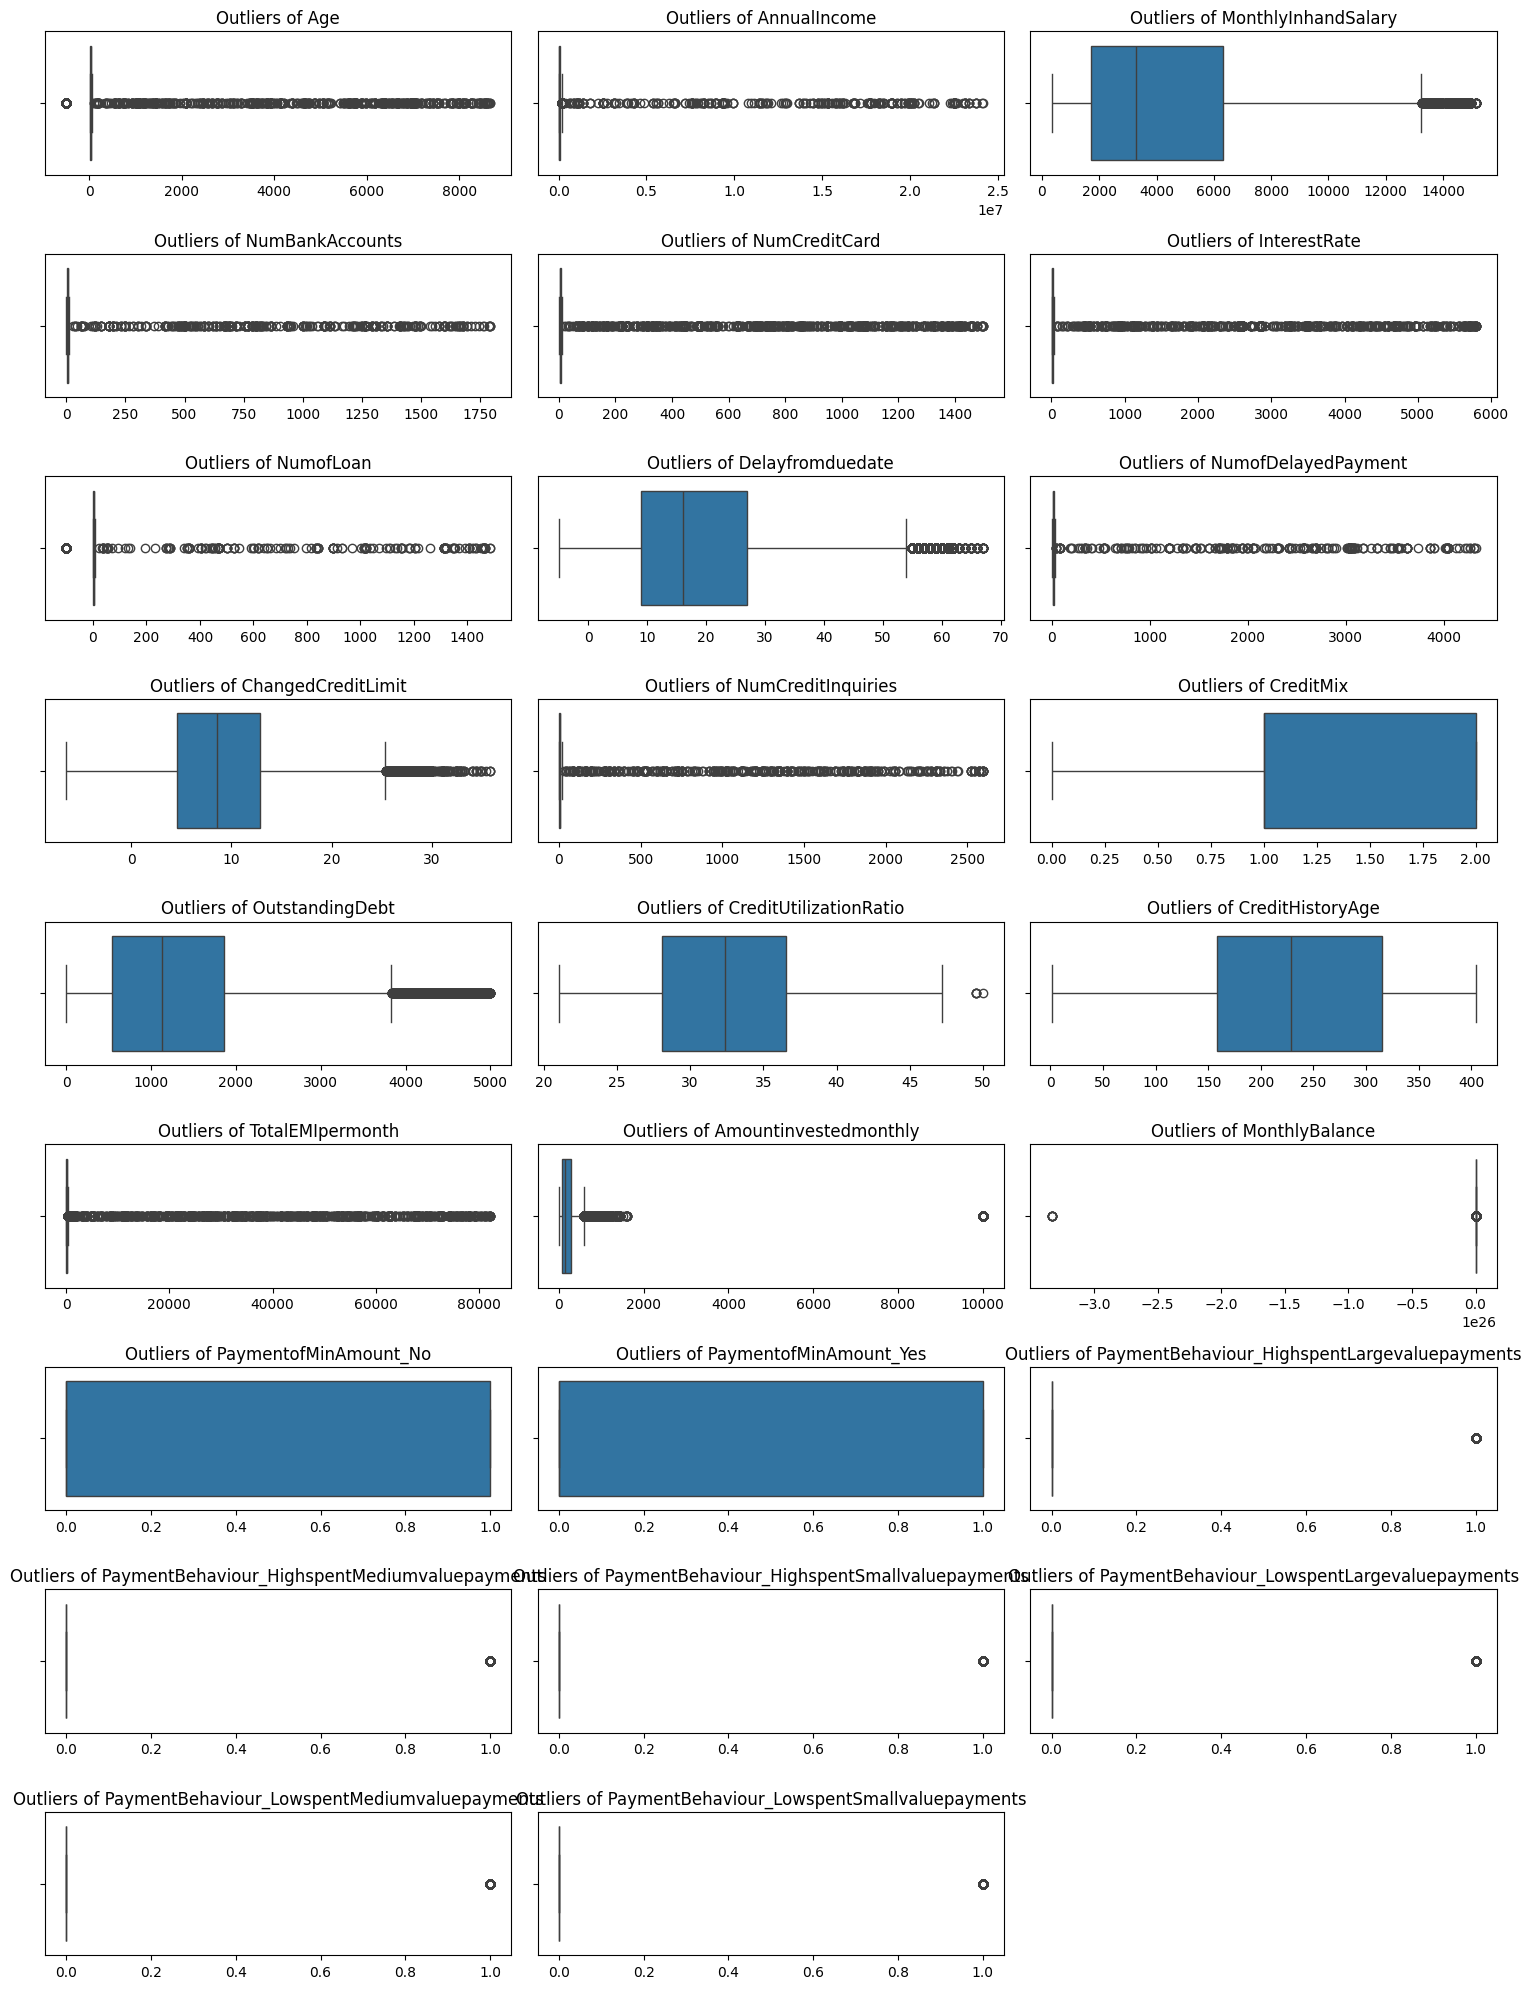

In [ ]:
df = data_oversampled.drop('CreditScore', axis = 1)
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df['CreditScore'] = data_oversampled['CreditScore']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
1      False         False                False            False   
10     False         False                False            False   
11     False         False                False            False   
12     False         False                False            False   
13     False         False                False            False   
...      ...           ...                  ...              ...   
16059  False         False                False            False   
16049  False         False                False            False   
15881  False         False                False            False   
3104   False         False                False            False   
3281   False         False                False            False   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
1              False         False      False             False   
10             False         False      False    

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
1      False         False                False            False   
10     False         False                False            False   
11     False         False                False            False   
12     False         False                False            False   
13     False         False                False            False   
...      ...           ...                  ...              ...   
16059  False         False                False            False   
16049  False         False                False            False   
15881  False         False                False            False   
3104   False         False                False            False   
3281   False         False                False            False   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
1              False         False      False             False   
10             False         False      False    

In [ ]:
s = set([
    'PaymentofMinAmount_No',
    'PaymentofMinAmount_Yes',
    'PaymentBehaviour_HighspentLargevaluepayments',
    'PaymentBehaviour_HighspentMediumvaluepayments',
    'PaymentBehaviour_HighspentSmallvaluepayments',
    'PaymentBehaviour_LowspentLargevaluepayments',
    'PaymentBehaviour_LowspentMediumvaluepayments',
    'PaymentBehaviour_LowspentSmallvaluepayments',
    'Age',
    'NumBankAccounts',
    'NumCreditCard',
    'InterestRate',
    'NumofLoan',
    'NumofDelayedPayment',
    'NumCreditInquiries'
])


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)

       Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  NumCreditCard  \
1       28      34847.84          3037.986667                2              4   
12      54      30689.89          2612.490833                2              5   
13      54      30689.89          2612.490833                2              5   
14      55      30689.89          2612.490833                2              5   
15      55      30689.89          2612.490833                2              5   
...    ...           ...                  ...              ...            ...   
17191   27      32904.13          2885.010833                2              7   
16049   26      71102.80          6185.233333                2              1   
15881   26      26976.43          2525.035833                7              7   
3104    30      73747.58          6166.631667                3              5   
3281    21      42888.45          3654.037500                5              2   

       InterestRate  NumofL

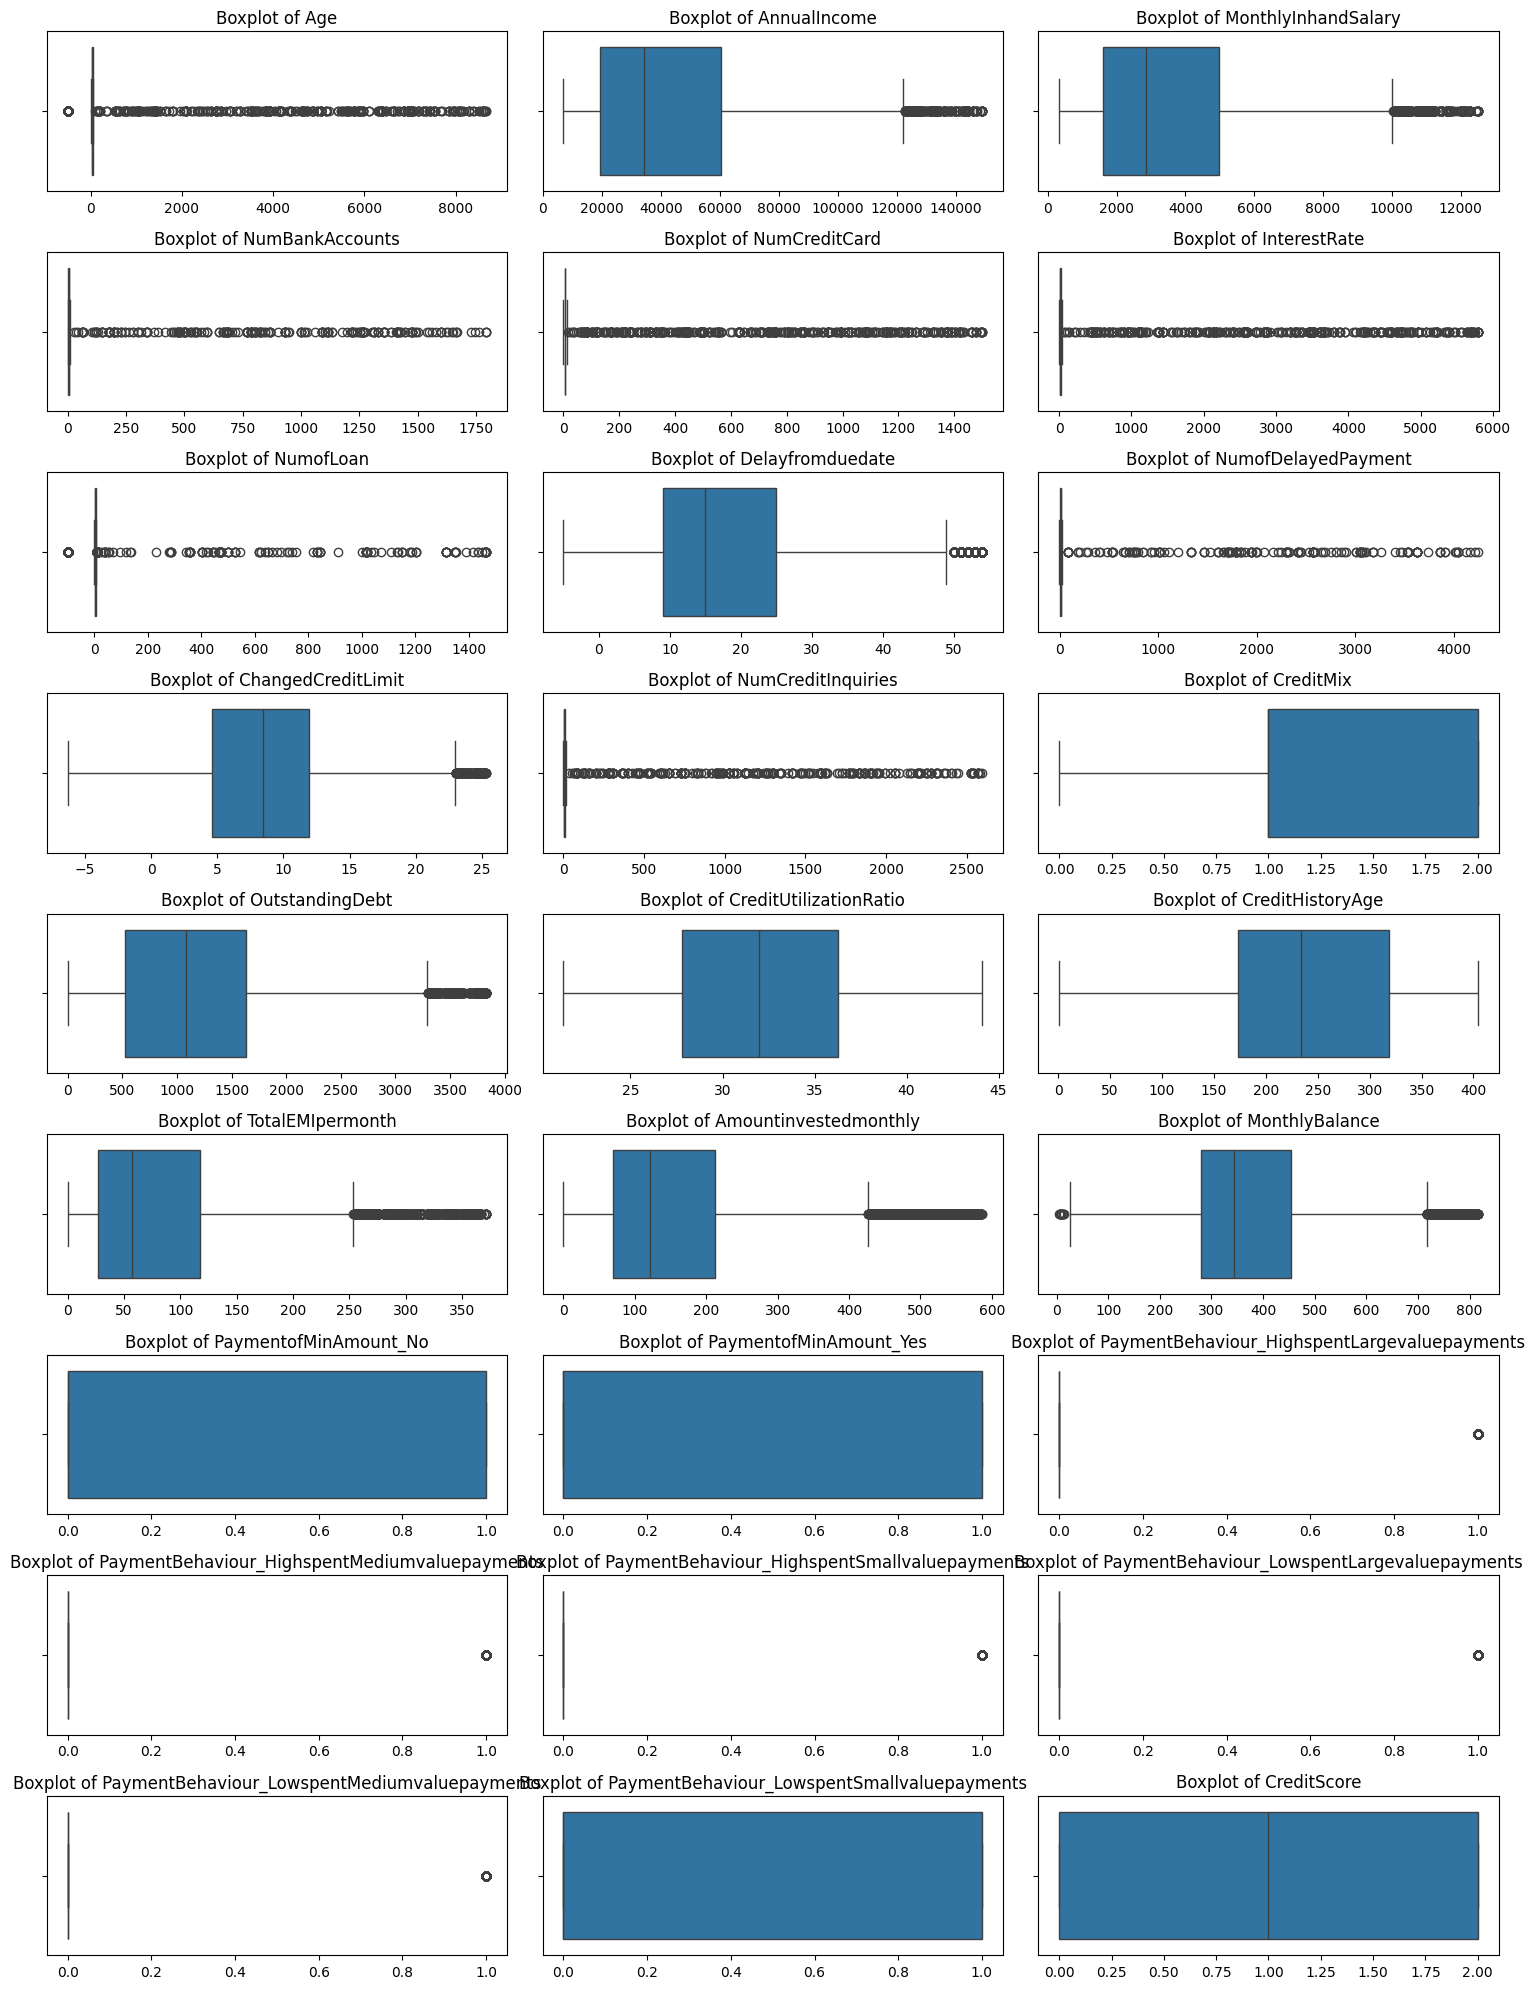

In [ ]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

axes = axes.ravel()

i = -1

for feature in df.columns:

    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df.reset_index(drop=True)

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,MonthlyBalance,PaymentofMinAmount_No,PaymentofMinAmount_Yes,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,CreditScore
0,28,34847.84,3037.986667,2,4,6,1.0,3.0,4.0,5.42,...,470.690627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,54,30689.89,2612.490833,2,5,4,1.0,0.0,6.0,1.99,...,433.604773,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,54,30689.89,2612.490833,2,5,4,1.0,5.0,3.0,1.99,...,409.951812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,55,30689.89,2612.490833,2,5,4,1.0,3.0,9.0,1.99,...,411.427123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
4,55,30689.89,2612.490833,2,5,4,1.0,7.0,6.0,-2.01,...,262.499594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,27,32904.13,2885.010833,2,7,2,2.0,2.0,2.0,1.43,...,247.667310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23408,26,71102.80,6185.233333,2,1,5,-100.0,16.0,2.0,8.73,...,781.592122,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
23409,26,26976.43,2525.035833,7,7,7,4.0,32.0,10.0,15.26,...,402.033275,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
23410,30,73747.58,6166.631667,3,5,7,2.0,33.0,14.0,15.10,...,259.977659,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

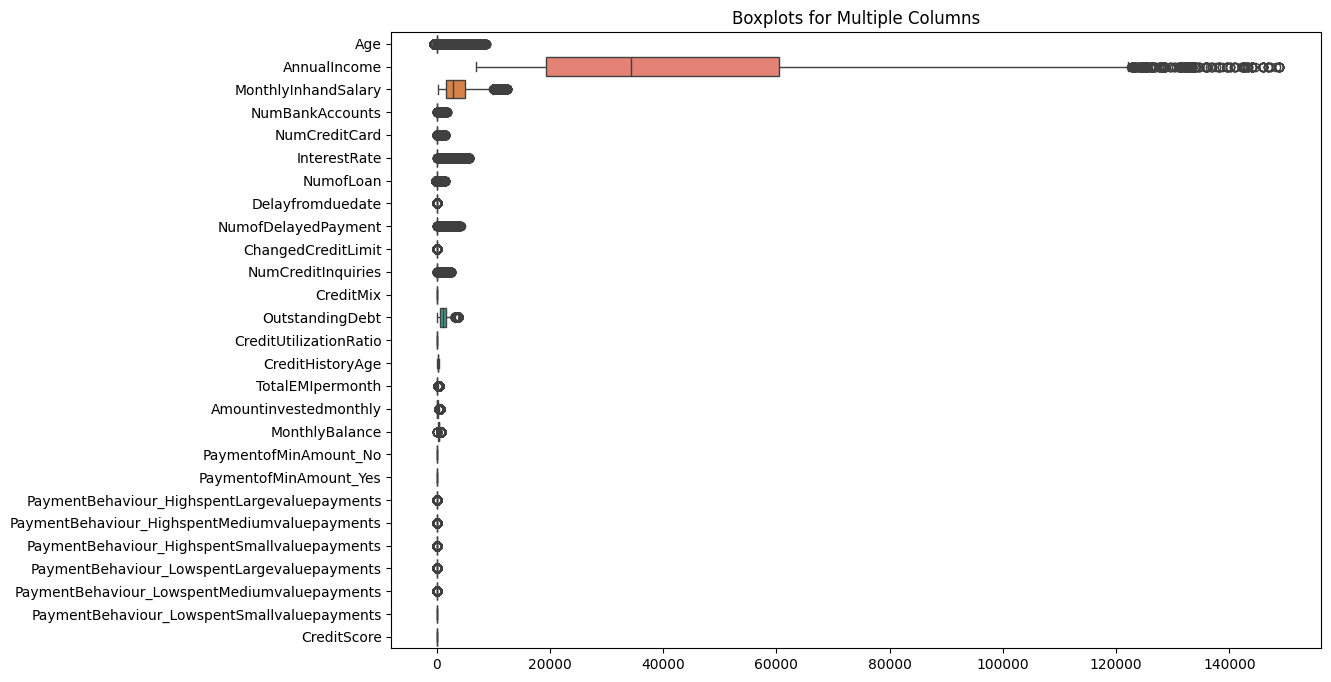

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots for Multiple Columns')

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

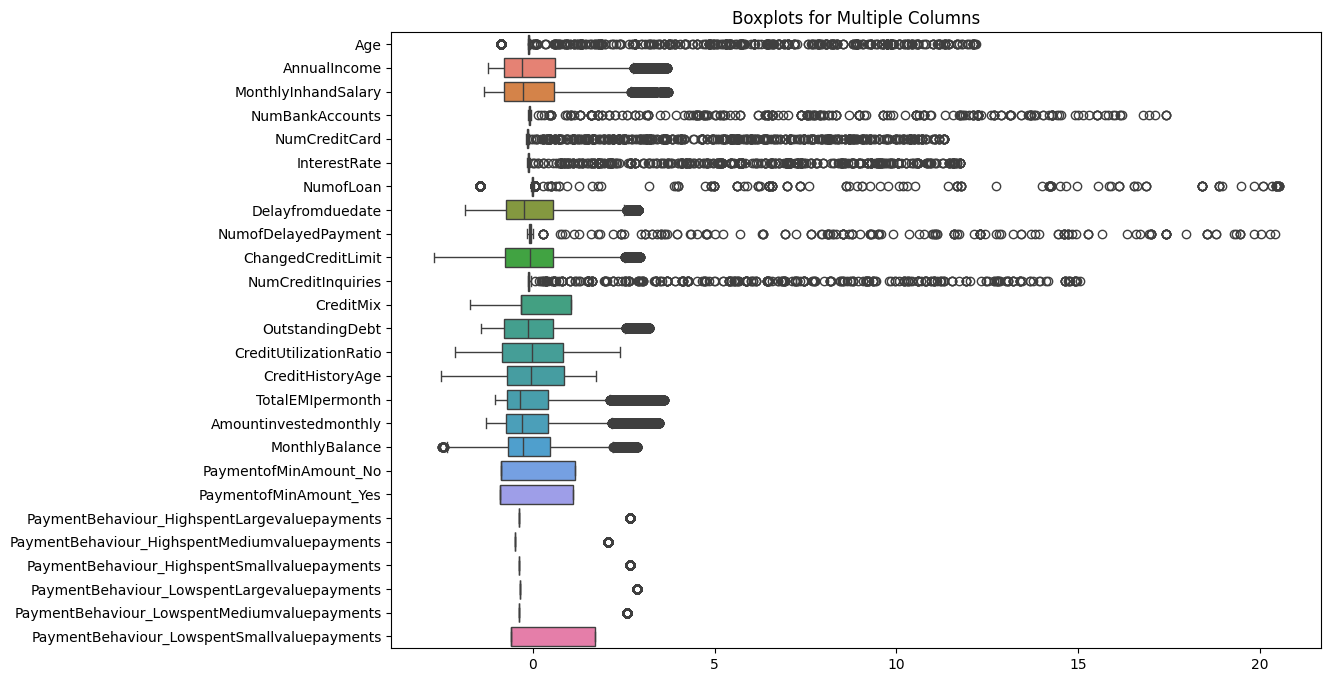

In [ ]:
df_without_outliers  = df.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = sc.transform(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns = df_without_outliers.drop('CreditScore', axis = 1).columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_oversampled_normalized_without_outliers, orient='h')
plt.title('Boxplots for Multiple Columns')

In [ ]:
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns=df_without_outliers.columns.difference(['CreditScore']))
data_oversampled_normalized_without_outliers['CreditScore'] = df_without_outliers.reset_index()['CreditScore']
data_oversampled_normalized_without_outliers

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,...,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,PaymentofMinAmount_No,PaymentofMinAmount_Yes,TotalEMIpermonth,CreditScore
0,-0.124328,-0.447152,-0.266427,-0.618604,0.847511,-0.335334,-1.510721,-1.208169,-0.143183,0.585229,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.814599,2
1,-0.087301,-0.634925,-0.410725,-1.233848,-0.337083,-0.335334,-1.096642,-1.449874,-0.147295,0.339226,...,-0.373635,-0.486453,-0.374821,2.876122,-0.384907,-0.585110,1.14825,-0.893628,-0.844724,2
2,-0.087301,-0.279513,-0.410725,-1.233848,-0.326507,-0.335334,0.642275,-1.047033,-0.147295,0.182328,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.844724,2
3,-0.085877,-0.617195,-0.410725,-1.233848,-0.315930,-0.335334,0.049319,-1.208169,-0.147295,0.192114,...,-0.373635,2.055698,-0.374821,-0.347690,-0.384907,-0.585110,-0.87089,-0.893628,-0.844724,2
4,-0.085877,0.921009,-0.410725,-1.951333,-0.305353,-0.335334,1.210060,-0.885896,-0.147295,-0.795773,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.844724,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,-0.125752,1.022509,-0.333882,-1.334296,-0.453427,-0.335334,-0.104778,-1.288737,-0.151406,-0.894161,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.473081,0
23408,-0.127176,-0.588498,0.991770,-0.024886,0.128293,-0.335334,1.695730,-0.160782,-0.145239,2.647546,...,-0.373635,2.055698,-0.374821,-0.347690,-0.384907,-0.585110,1.14825,-0.893628,-1.050704,0
23409,-0.127176,-0.987373,-0.539598,1.146409,0.667706,1.052966,0.950858,1.128310,-0.141127,0.129802,...,-0.373635,2.055698,-0.374821,-0.347690,-0.384907,-0.585110,-0.87089,1.119034,-0.266076,0
23410,-0.121480,3.128558,1.083555,1.117709,1.323463,1.052966,0.102012,1.208878,-0.141127,-0.812502,...,-0.373635,-0.486453,-0.374821,-0.347690,2.598028,-0.585110,-0.87089,1.119034,0.118928,0


In [ ]:
df2 = data_oversampled_normalized_without_outliers.copy()
df2

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,...,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,PaymentofMinAmount_No,PaymentofMinAmount_Yes,TotalEMIpermonth,CreditScore
0,-0.124328,-0.447152,-0.266427,-0.618604,0.847511,-0.335334,-1.510721,-1.208169,-0.143183,0.585229,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.814599,2
1,-0.087301,-0.634925,-0.410725,-1.233848,-0.337083,-0.335334,-1.096642,-1.449874,-0.147295,0.339226,...,-0.373635,-0.486453,-0.374821,2.876122,-0.384907,-0.585110,1.14825,-0.893628,-0.844724,2
2,-0.087301,-0.279513,-0.410725,-1.233848,-0.326507,-0.335334,0.642275,-1.047033,-0.147295,0.182328,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.844724,2
3,-0.085877,-0.617195,-0.410725,-1.233848,-0.315930,-0.335334,0.049319,-1.208169,-0.147295,0.192114,...,-0.373635,2.055698,-0.374821,-0.347690,-0.384907,-0.585110,-0.87089,-0.893628,-0.844724,2
4,-0.085877,0.921009,-0.410725,-1.951333,-0.305353,-0.335334,1.210060,-0.885896,-0.147295,-0.795773,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.844724,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,-0.125752,1.022509,-0.333882,-1.334296,-0.453427,-0.335334,-0.104778,-1.288737,-0.151406,-0.894161,...,-0.373635,-0.486453,-0.374821,-0.347690,-0.384907,1.709079,1.14825,-0.893628,-0.473081,0
23408,-0.127176,-0.588498,0.991770,-0.024886,0.128293,-0.335334,1.695730,-0.160782,-0.145239,2.647546,...,-0.373635,2.055698,-0.374821,-0.347690,-0.384907,-0.585110,1.14825,-0.893628,-1.050704,0
23409,-0.127176,-0.987373,-0.539598,1.146409,0.667706,1.052966,0.950858,1.128310,-0.141127,0.129802,...,-0.373635,2.055698,-0.374821,-0.347690,-0.384907,-0.585110,-0.87089,1.119034,-0.266076,0
23410,-0.121480,3.128558,1.083555,1.117709,1.323463,1.052966,0.102012,1.208878,-0.141127,-0.812502,...,-0.373635,-0.486453,-0.374821,-0.347690,2.598028,-0.585110,-0.87089,1.119034,0.118928,0


In [ ]:
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_regression_model_ovr.fit(X_train, y_train)
y_pred_ovr = logistic_regression_model_ovr.predict(X_test)
logistic_regression_model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_regression_model_multinomial.fit(X_train, y_train)
y_pred_multinomial = logistic_regression_model_multinomial.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("OvR Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ovr):.2f}')
print("\nSoftmax (Multinomial) Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_multinomial):.2f}')

OvR Model:
Accuracy: 0.71

Softmax (Multinomial) Model:
Accuracy: 0.71


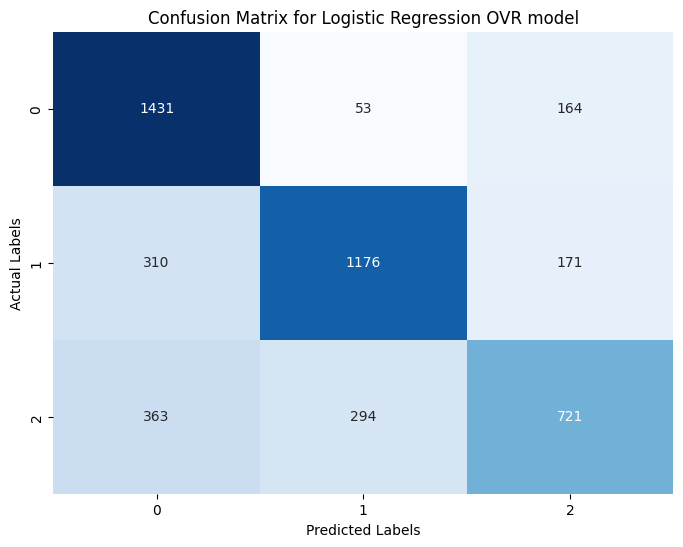

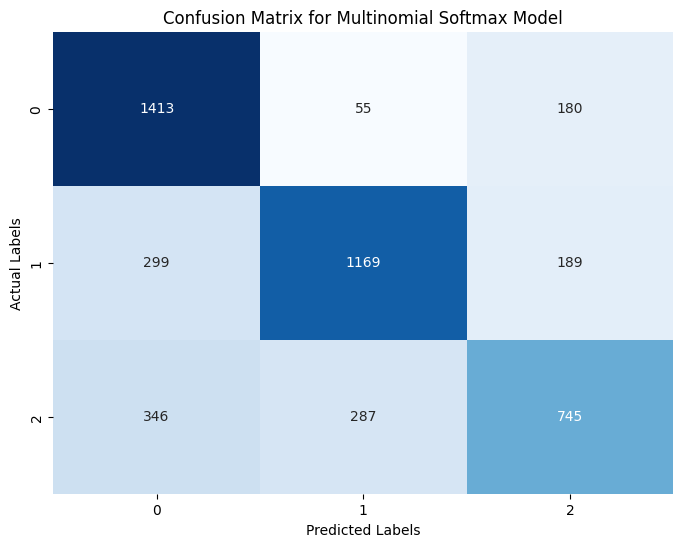

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ovr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic Regression OVR model')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_multinomial), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Multinomial Softmax Model')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_scaled, y_train)
y_pred = naive_bayes_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.61


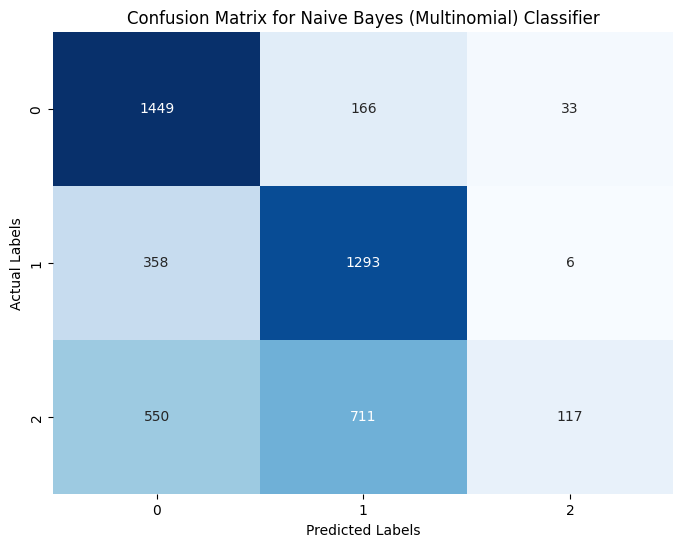

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Naive Bayes (Multinomial) Classifier')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1648
           1       0.90      0.98      0.94      1657
           2       0.96      0.76      0.85      1378

    accuracy                           0.92      4683
   macro avg       0.92      0.91      0.91      4683
weighted avg       0.92      0.92      0.92      4683



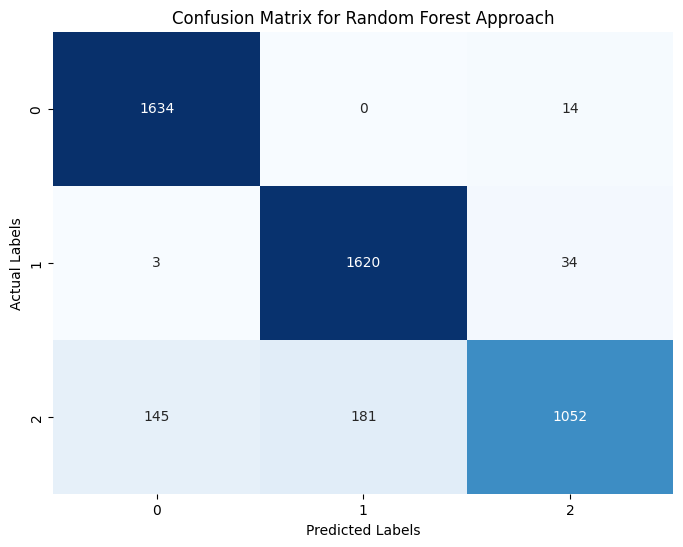

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Approach')
plt.show()